# **Customer Churn**

*Customer churn, also known as customer attrition, refers to the loss of customers or clients over a given period. In the context of a business, it is the percentage of subscribers to a service who discontinue their subscriptions within a given time period. Understanding and analyzing customer churn is crucial for businesses because retaining existing customers is generally more cost-effective than acquiring new ones.*

*The churn rate is the percentage of customers who leave a service over a specific period.*

*By systematically analyzing customer churn, businesses can develop effective strategies to retain customers, improve customer satisfaction, and ultimately enhance profitability.*

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

### **LOAD DATA**

In [2]:
import pandas as pd # type: ignore
df = pd.read_csv(r"C:\Users\konal\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### **STUDY DATA**

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of 7043 entries and 21 columns.

The **TotalCharges** column is currently of type object, but it should be a numerical type (float64).

Convert the **TotalCharges** column to a numerical type and handle any potential issues during the conversion.

In [3]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' will introduce NaNs for conversion errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for null values
null_values = df.isnull().sum()
null_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df['TotalCharges'].dtype

dtype('float64')

* The **TotalCharges** column had 11 missing values after conversion to numeric.
* All other columns have complete data.

### **HANDLE NULL VALUES AND OUTLIERS**

**Handle Null Values**

In [5]:
print(df[df['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

* A tenure of 0 means that they are the  customers who just signed up.

* Upon Observing, we can see that the missing 11 values are of customers who has '0' tenure, so they wouldn't have a **"TotalCharges"** value yet as they have no tenure to bill their TotalCharge.

In [6]:
# Fill missing values in 'TotalCharges' with the '0'
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify there are no more null values
null_values_after = df.isnull().sum()
null_values_after


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**OUTLIERS**

In [7]:
# Function to calculate and count outliers
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

# Identify and count outliers
outliers_monthlycharges, num_outliers_monthlycharges = count_outliers('MonthlyCharges')
outliers_totalcharges, num_outliers_totalcharges = count_outliers('TotalCharges')
outliers_tenure, num_outliers_tenure = count_outliers('tenure')


# Print the number of outliers for each column
print(f"Number of outliers in MonthlyCharges: {num_outliers_monthlycharges}")
print(f"Number of outliers in TotalCharges: {num_outliers_totalcharges}")
print(f"Number of outliers in tenure: {num_outliers_tenure}")

Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in tenure: 0


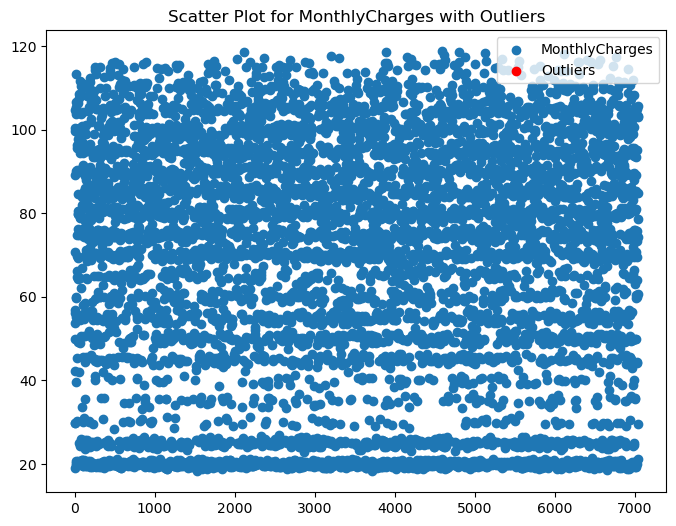

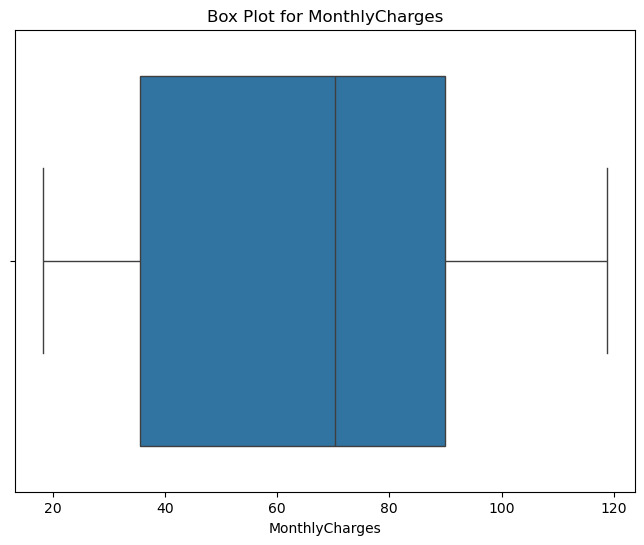

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['MonthlyCharges'], label='MonthlyCharges')
plt.scatter(outliers_monthlycharges.index, outliers_monthlycharges['MonthlyCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for MonthlyCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot for MonthlyCharges')
plt.show()

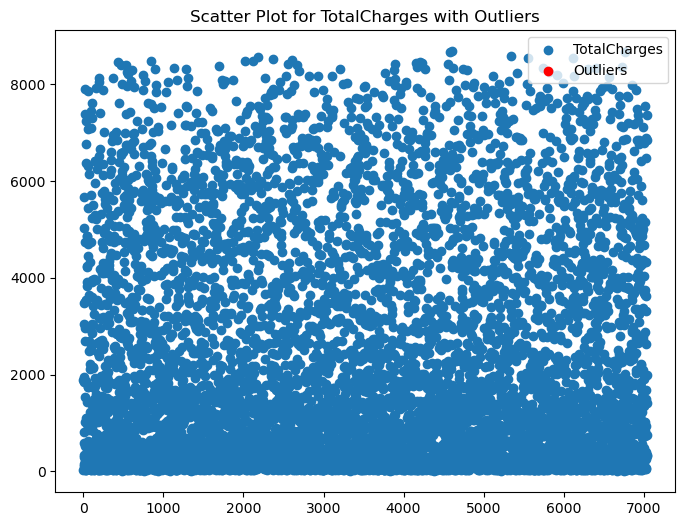

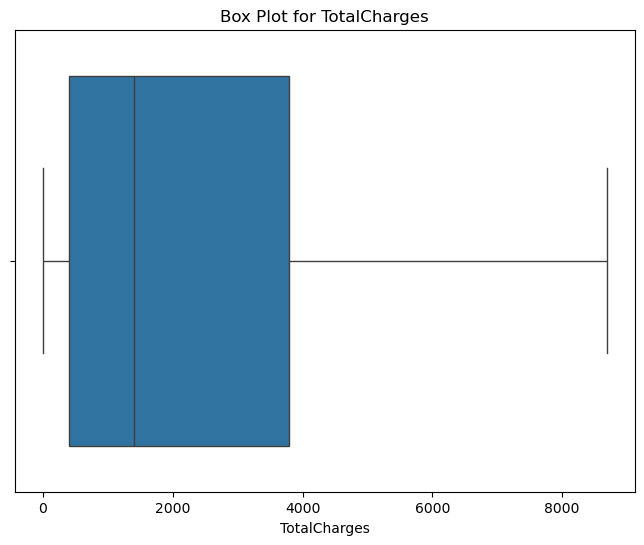

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['TotalCharges'], label='TotalCharges')
plt.scatter(outliers_totalcharges.index, outliers_totalcharges['TotalCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for TotalCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot for TotalCharges')
plt.show()

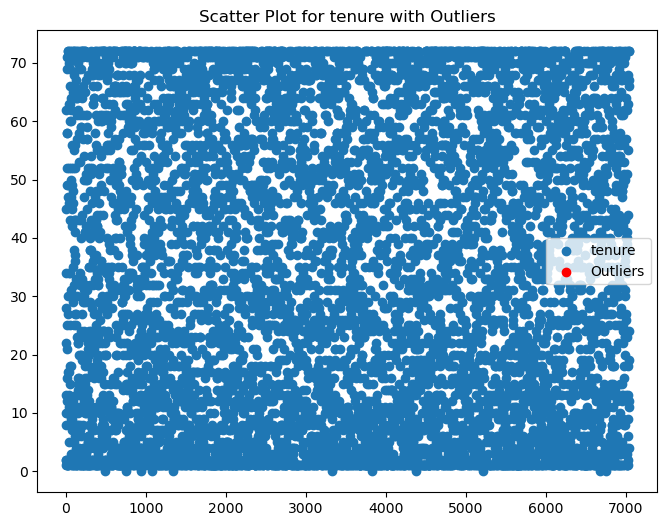

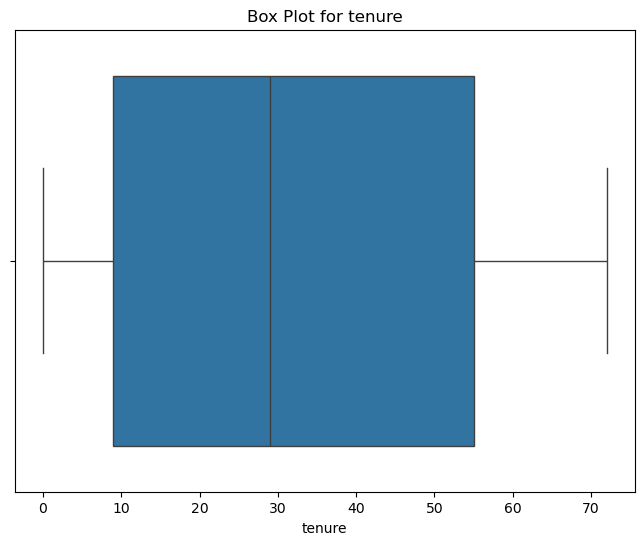

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['tenure'], label='tenure')
plt.scatter(outliers_tenure.index, outliers_tenure['tenure'], color='red', label='Outliers')
plt.title('Scatter Plot for tenure with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot for tenure')
plt.show()

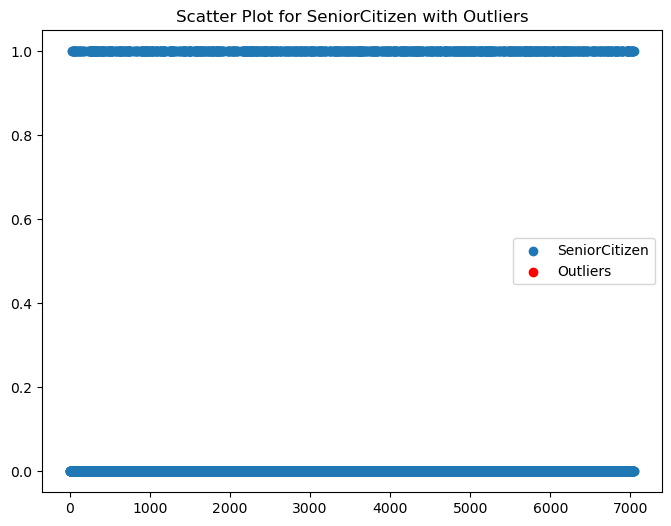

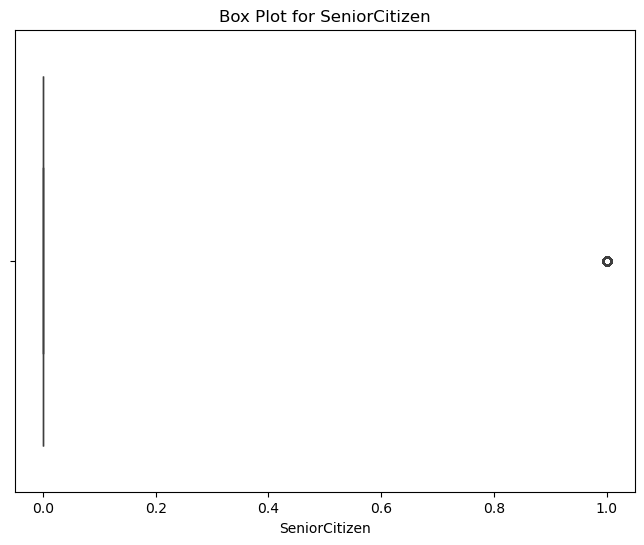

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['SeniorCitizen'], label='SeniorCitizen')
plt.scatter(outliers_tenure.index, outliers_tenure['SeniorCitizen'], color='red', label='Outliers')
plt.title('Scatter Plot for SeniorCitizen with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SeniorCitizen'])
plt.title('Box Plot for SeniorCitizen')
plt.show()


# Display the value counts
senior_citizen_counts = df['SeniorCitizen'].value_counts()
print(senior_citizen_counts)

In [12]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

In [13]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn Rate: {churn_rate}")

Churn Rate: Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


### **Univariate Analysis**

Univariate analysis is a statistical method that focuses on analyzing each variable in a dataset individually.

**Contract**
* The type of contract customers have (Month-to-month, One year, Two year).

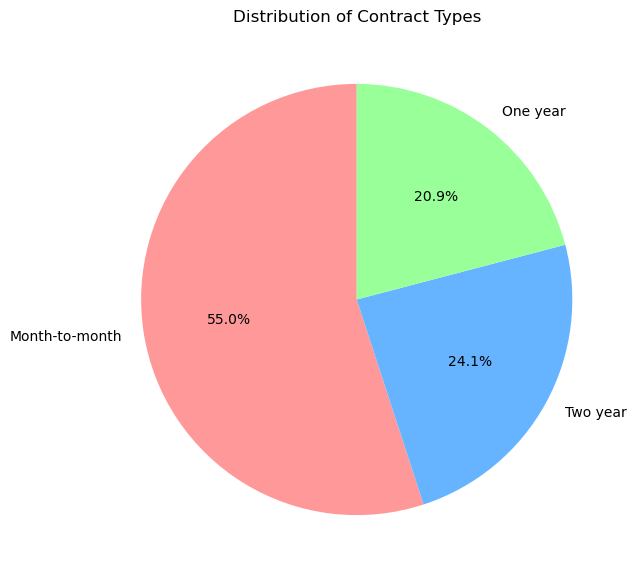

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [56]:
plt.figure(figsize=(10, 7))
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Contract Types')
plt.ylabel('')
plt.show()

df['Contract'].value_counts()


* **Month-to-month** contracts are the most common, followed by one-year and two-year contracts.

* This indicates that a significant portion of the customer base prefers the flexibility of a month-to-month contract.

**Internet Service**

* The type of internet service customers have (DSL, Fiber optic, No).

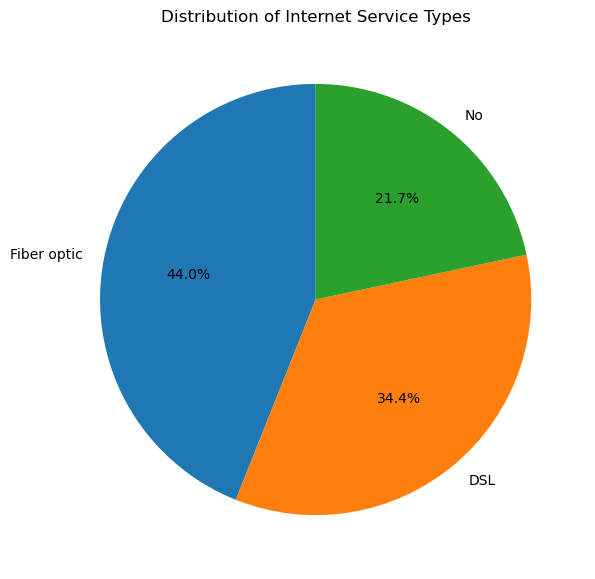

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [57]:
# Internet Service
plt.figure(figsize=(10, 7))
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Internet Service Types')
plt.ylabel('')
plt.show()

df['InternetService'].value_counts()


* **Fiber optic** is the most common internet service, followed by DSL, with a smaller number of customers having no internet service.

* This suggests that customers prefer faster internet options.

**Payment Method**

* The method of payment customers use (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

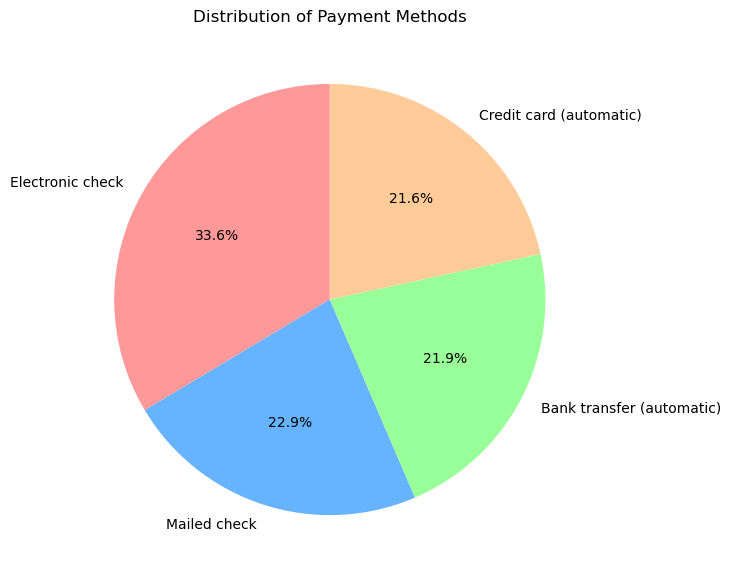

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [58]:
# Payment Method
plt.figure(figsize=(10, 7))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', '#ffcc99'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

df["PaymentMethod"].value_counts()

* **Electronic check** is the most common payment method, followed by mailed check, bank transfer, and credit card payments.

* This indicates a preference for electronic and automated payment methods among customers.

## **BIVARIATE ANALYSIS**

Bivariate analysis is a statistical method that examines the relationship between two variables. It explores if and how two variables are associated or correlated with each other.

### **Gender Vs Churn**

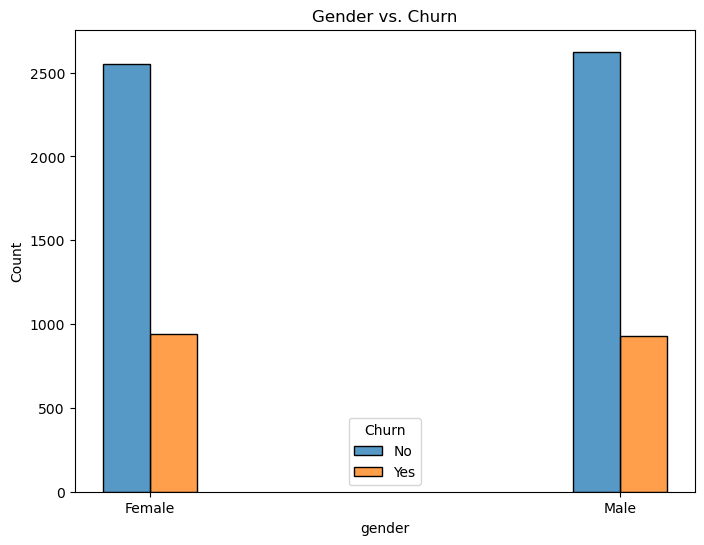

gender
Male      3555
Female    3488
Name: count, dtype: int64 

gender
Female    939
Male      930
Name: count, dtype: int64


In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(x='gender', hue='Churn', data=df, shrink=0.2, multiple='dodge')
plt.title('Gender vs. Churn')
plt.show()

print(df['gender'].value_counts(),'\n')

churned_gender_count = df[df['Churn']=='Yes']['gender'].value_counts()
print(churned_gender_count)

*Observation:* 
* There is no significant difference in churn rates between male and female customers.

* male and female customers are equally likely to stay or move out, indicating that gender doesn't influence the decision to churn.

### **SeniorCitizen vs. Churn**

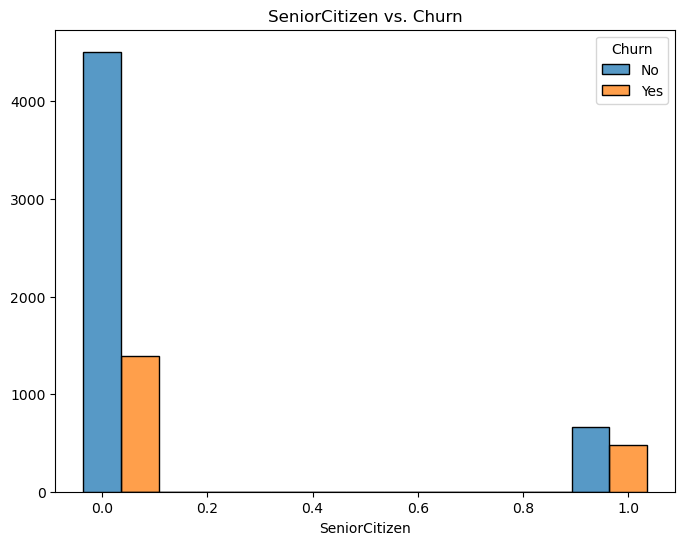

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

SeniorCitizen
0    1393
1     476
Name: count, dtype: int64


In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(x='SeniorCitizen', hue='Churn', data=df, shrink = 2, multiple='dodge')
plt.title('SeniorCitizen vs. Churn')
plt.ylabel('')
plt.show()

print(df['SeniorCitizen'].value_counts(),'\n')

churned_senior_citizen_count = df[df['Churn']=='Yes']["SeniorCitizen"].value_counts()
print(churned_senior_citizen_count)

*Observation :* 
* Senior citizens have a higher churn rate compared to non-senior citizens.

* Older citizens might be looking for more specialized services or amenities that aren't available, leading to a higher likelihood of moving out.

### **Partner vs. Churn**

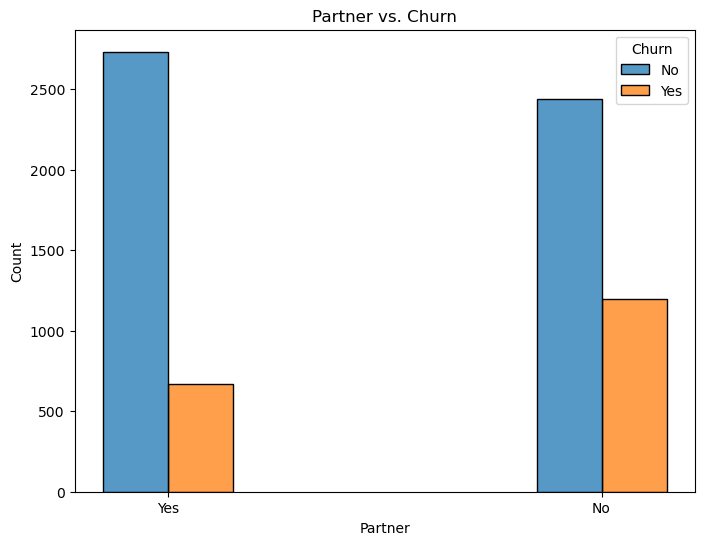

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Partner
No     1200
Yes     669
Name: count, dtype: int64


In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Partner', hue='Churn',data=df, shrink=0.3, multiple='dodge')
plt.title('Partner vs. Churn')
plt.show()

print(df['Partner'].value_counts(),'\n')

churned_partner_count = df[df['Churn']=='Yes']["Partner"].value_counts()
print(churned_partner_count)

*Observation :* 
* Customers without partners are more likely to churn.

* Single customers might feel less attached to the community or lack the support system that partnered ones have, making them more likely to leave.

### **Dependents vs. Churn**

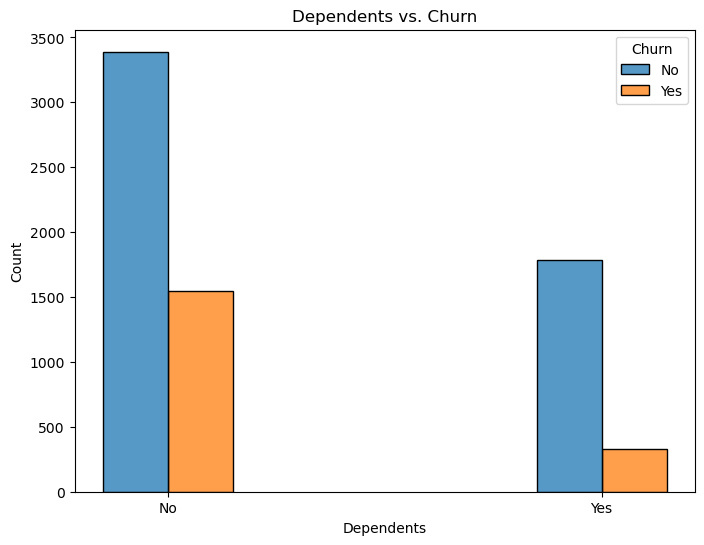

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

Dependents
No     1543
Yes     326
Name: count, dtype: int64


In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Dependents', hue='Churn', data=df, shrink=0.3, multiple='dodge')
plt.title('Dependents vs. Churn')
plt.show()

print(df['Dependents'].value_counts(),'\n')

churned_dependent_count = df[df['Churn']=='Yes']["Dependents"].value_counts()
print(churned_dependent_count)

*Observation :* 
* Customers without dependents have a higher churn rate.

* Customers without families might have fewer reasons to stay in one place, making them more flexible and more likely to move out.

### **InternetService Vs Churn**

Which InternetService customers are churing more?

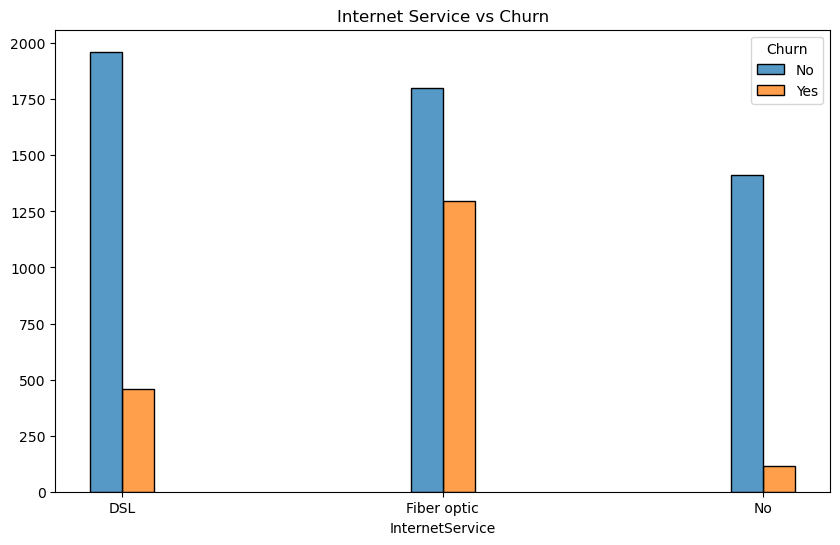

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64


In [75]:
# Hist plot for Internet Service and Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='InternetService', hue='Churn',multiple='dodge',shrink=0.2)
plt.title('Internet Service vs Churn')
plt.ylabel('')
plt.show()

print(df['InternetService'].value_counts(),'\n')

churned_InternetService_count = df[df['Churn']=='Yes']["InternetService"].value_counts()
print(churned_InternetService_count)


* **Fiber optic** customers have a higher number of churns compared to DSL and No internet service customers. This might indicate issues related to service satisfaction or cost.

**Why Fiber optic customers are Churning?**

Let's check their reasons to churn

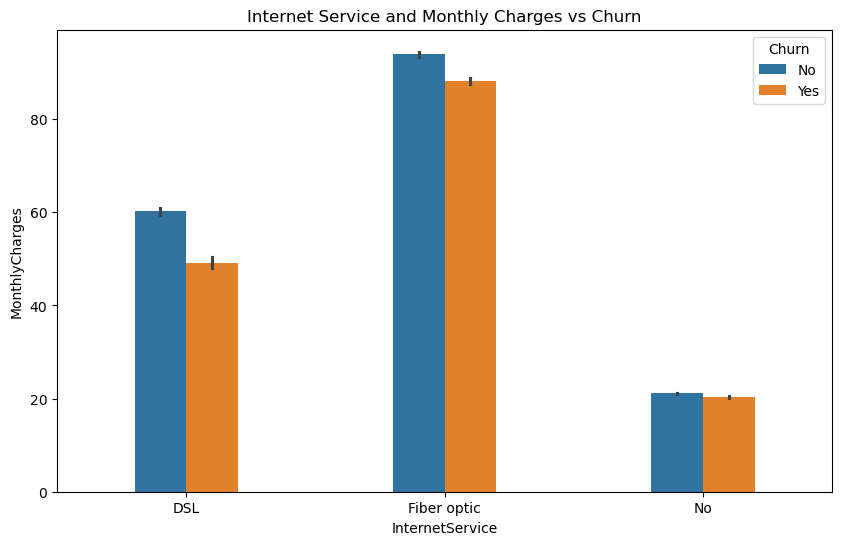

In [53]:
# Bivariate analysis for Internet Service and Monthly Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn',width=0.4)
plt.title('Internet Service and Monthly Charges vs Churn')
plt.show()


* This bar plot shows the distribution of monthly charges for each type of Internet service (DSL, Fiber optic, and No internet service), split by churn status.

* Customers with **Fiber optic** service have higher monthly charges and also show a higher tendency to churn compared to those with DSL or no internet service. 

* This indicates that higher costs associated with Fiber optic service might be a factor in customer churn.

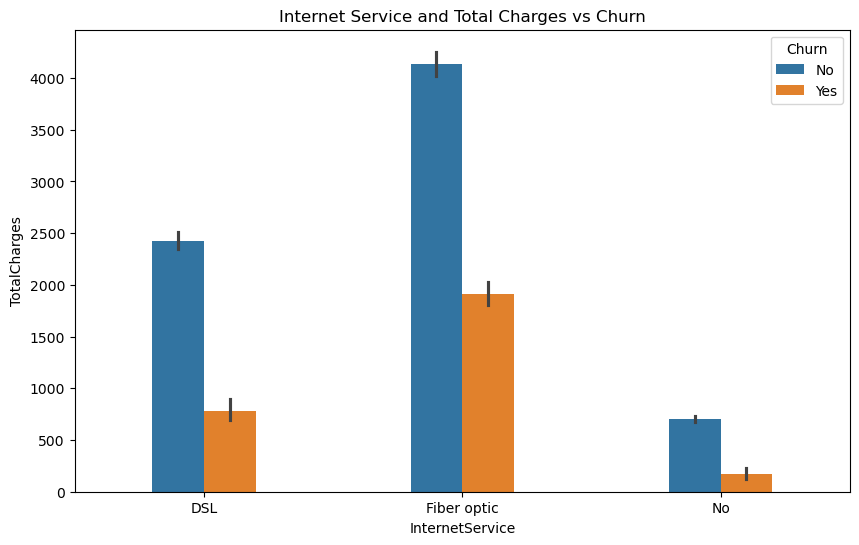

In [55]:
# Bivariate analysis for Internet Service and Total Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='InternetService', y='TotalCharges', hue='Churn',width=0.4)
plt.title('Internet Service and Total Charges vs Churn')
plt.show()


* Similar to monthly charges, total charges for **Fiber optic** users are generally higher, and there is a noticeable number of these customers who have churned. 

* This supports the idea that higher charges might be leading to higher churn rates among **Fiber optic** users.

### **Phone Service Vs Churn**

Which PhoneService Customers are churning?

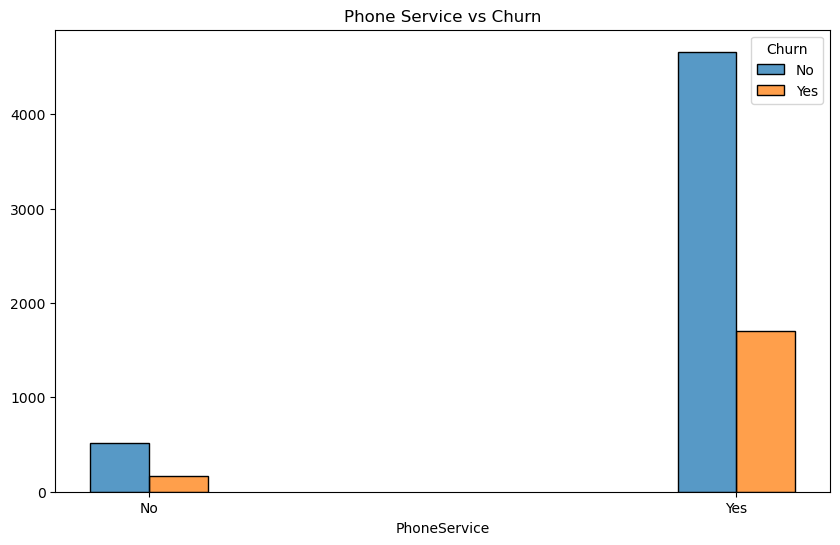

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

PhoneService
Yes    1699
No      170
Name: count, dtype: int64


In [76]:
# Hist plot for Phone Service and Churn

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhoneService', hue='Churn', multiple='dodge', shrink=0.2)
plt.title('Phone Service vs Churn')
plt.ylabel('')
plt.show()

print(df['PhoneService'].value_counts(),'\n')

churned_PhoneService_count = df[df['Churn']=='Yes']["PhoneService"].value_counts()
print(churned_PhoneService_count)


* This Hist plot shows the number of customers with and without phone service and how many of them churned.

* The majority of customers have **phone service**, and there is a similar proportion of churners among those with and without phone service. This indicates that phone service alone may not be a primary factor in customer churn.

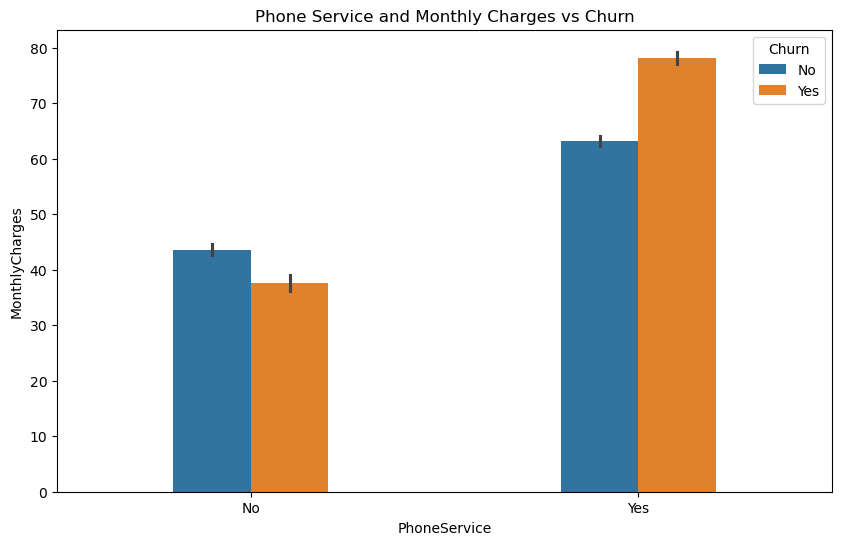

In [68]:
# Bivariate analysis for Phone Service and Monthly Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PhoneService', y='MonthlyCharges', hue='Churn', width=0.4)
plt.title('Phone Service and Monthly Charges vs Churn')
plt.show()


* There is not a significant difference in monthly charges between customers with and without phone service. 

* This suggests that phone service alone may not be a strong predictor of churn when considering monthly charges.

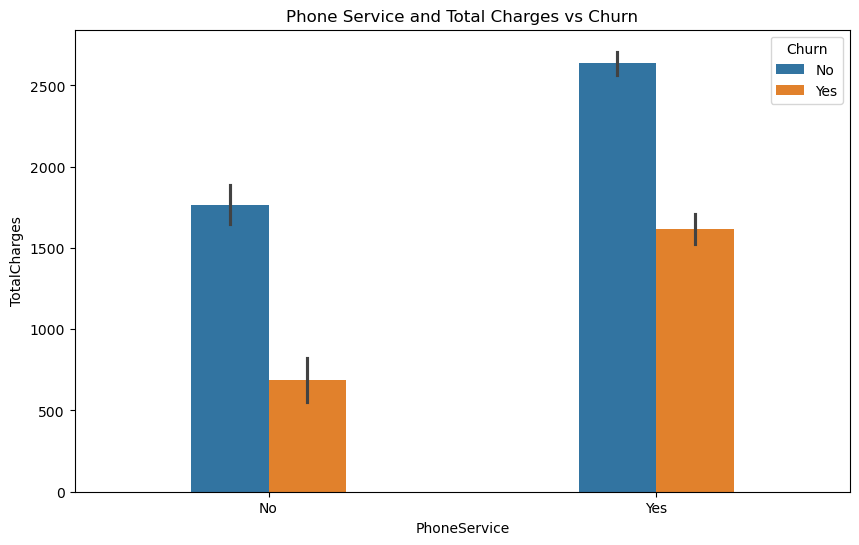

In [69]:
# Bivariate analysis for Phone Service and Total Charges
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='PhoneService', y='TotalCharges', hue='Churn', width = 0.4)
plt.title('Phone Service and Total Charges vs Churn')
plt.show()


* Similar to monthly charges, total charges do not show a significant difference between customers with and without phone service.


**Phone service** alone does not show a strong relationship with churn. Both *customers with* and *without phone service* have similar churn rates.

However, we cannot  conclude that **phone service** is not a influencing factor in customer churning.

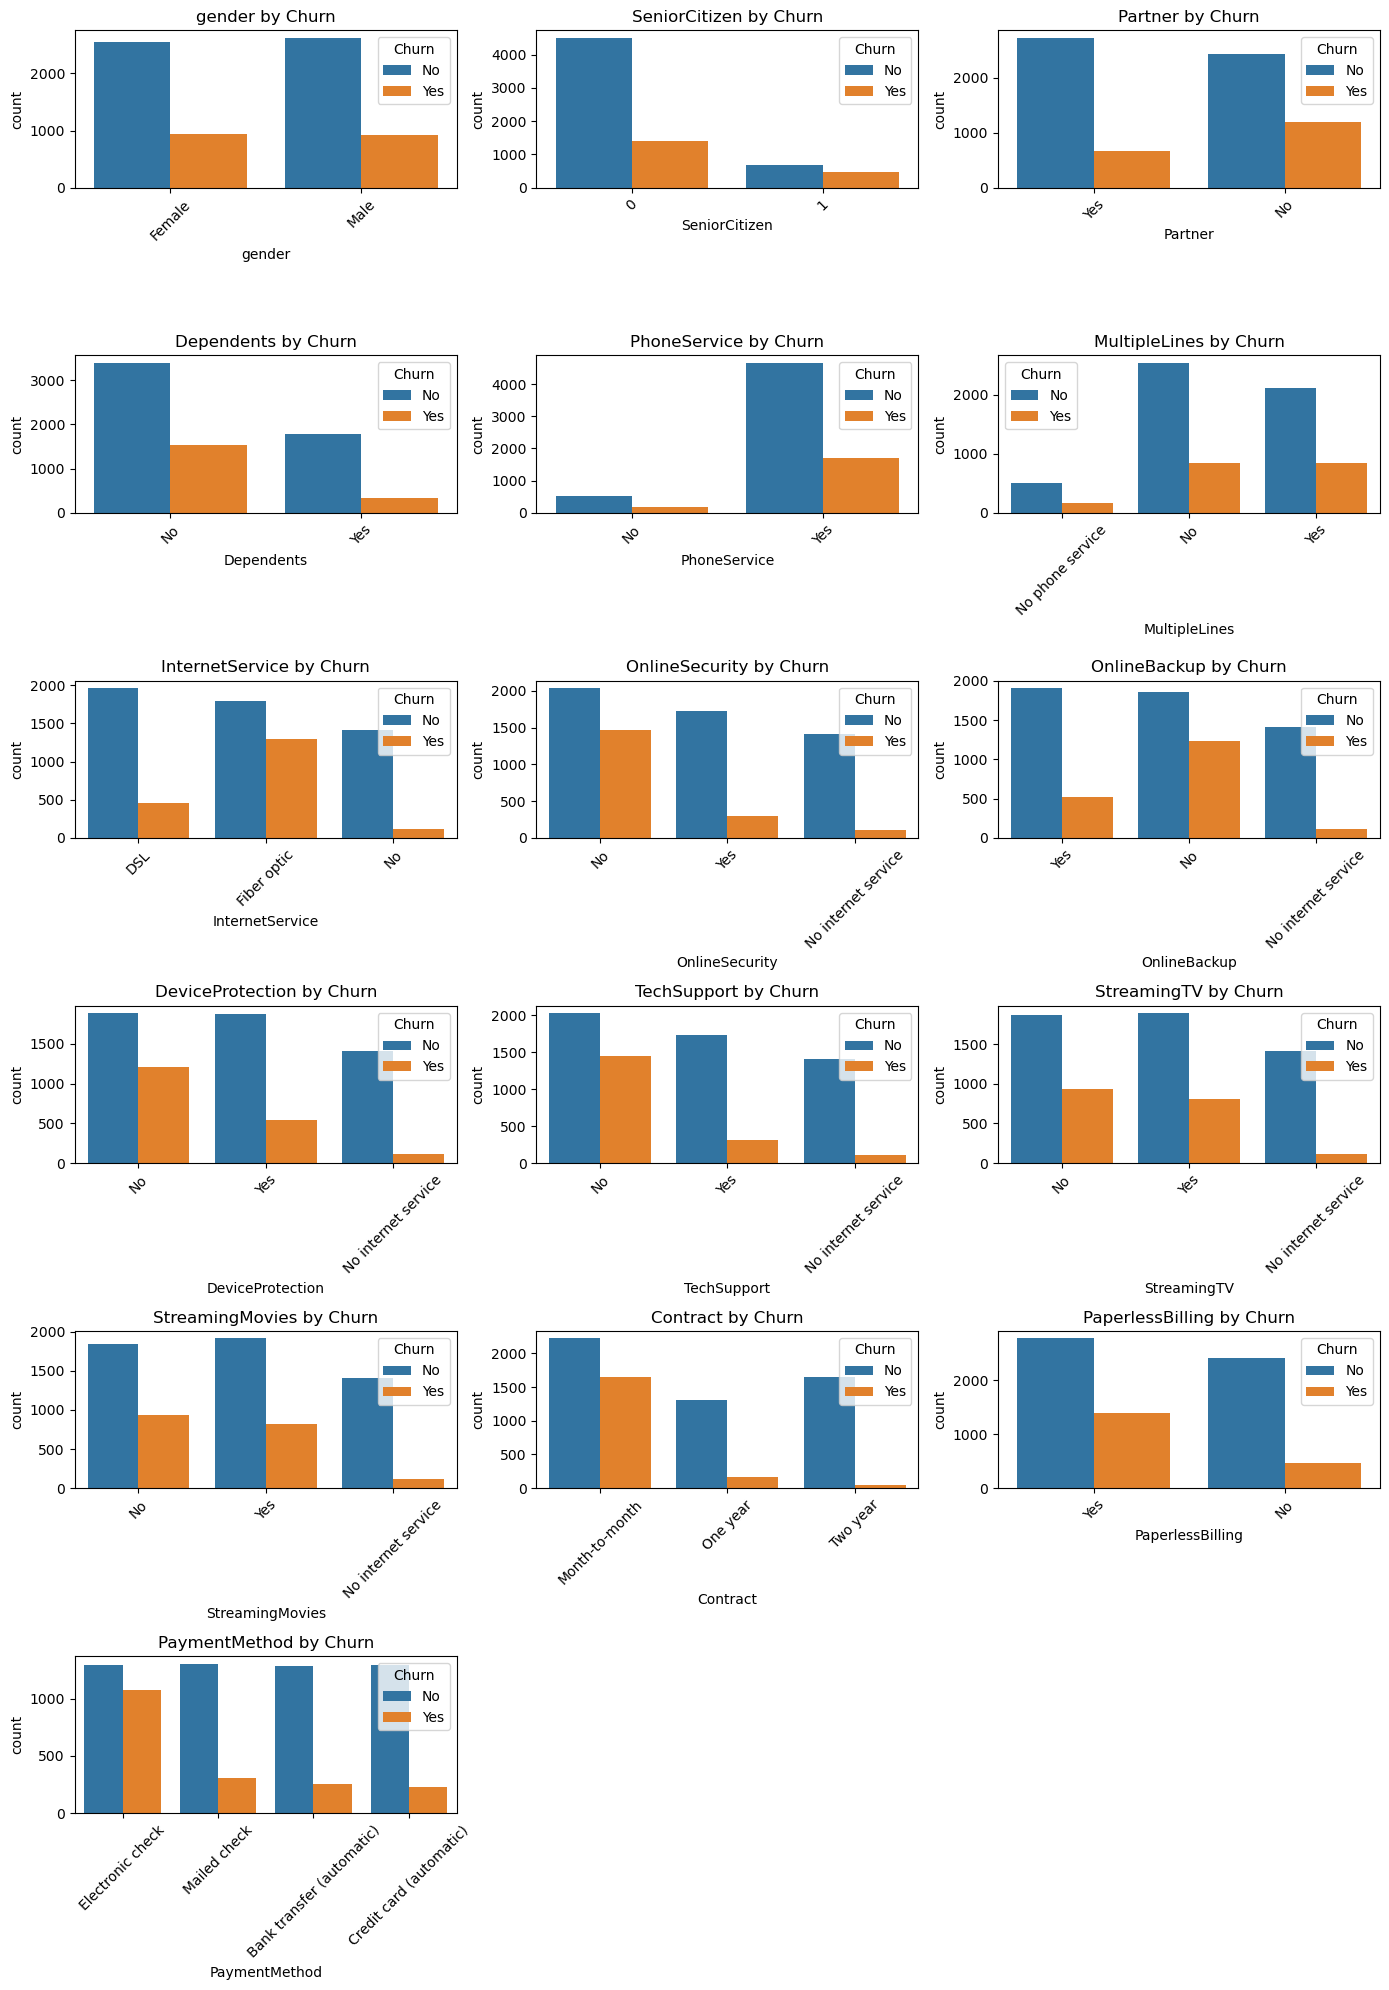

In [20]:
plt.figure(figsize=(14, 20))
for i, column in enumerate(categorical_columns[:-1], 1):   # type: ignore
    plt.subplot(6, 3, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} by Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# categorical_columns[:-1] ==> Excludes Churn

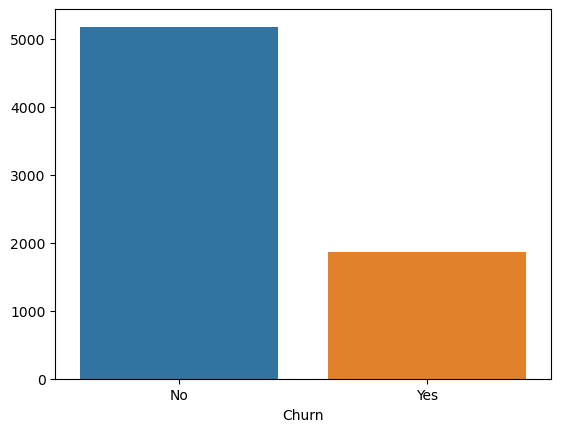

In [91]:
sns.countplot(x='Churn', data=df, hue='Churn')
plt.ylabel('')
plt.show()